In [1]:
%matplotlib inline
#Standard imports
import numpy as np
import matplotlib.pyplot as plt
#own modules
from decomp_algorithm import run_algorithm
from sigmoid import g,dg,ddg,dddg
import myplots



g_name = "sigmoid"
m=16
m_1= 8
d=25
m_x=4000
res_2, res_3, data, ddf = run_algorithm(m,m_1,d,m_x, symm = False, verbose = True)
U_2, D_2, V_2 = res_2
U_3, D_3, V_3 = res_3
A,B,X = data

[myplots.py]: Saving plots to /home/pca/code/ma/plots
[run_alg] Creating data...
[run_alg] Finished creating data, time elapsed 0.024831771850585938
[run_alg] Calculating second derivative...
[run_alg] Finished second derivative, time elapsed 0.2193925380706787
[run_alg] Calculating third derivative...
[run_alg] Finished third derivative, time elapsed 12.269998550415039
[run_alg] Decomposing M_2...
[run_alg] Finished decomposition of M_2, time elapsed 0.5500004291534424
[run_alg] Decomposing M_3...
[run_alg] Finished decomposition of M_3, time elapsed 56.90325736999512
[run_alg] Returning, hole execution time: 69.96748065948486


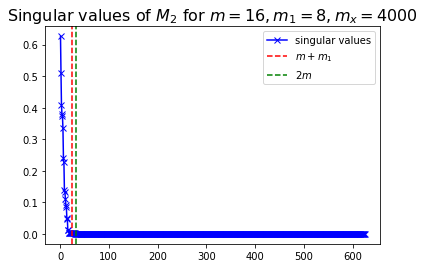

In [2]:
myplots.plot_singular_values(D_2, m,m_1, m_x, der = 2)

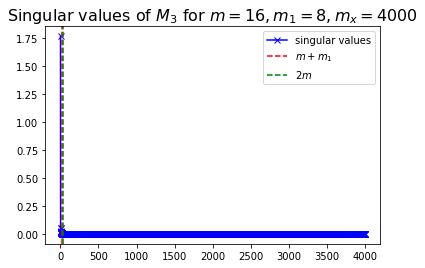

In [3]:
myplots.plot_singular_values(D_3, m,m_1, m_x, der = 3)

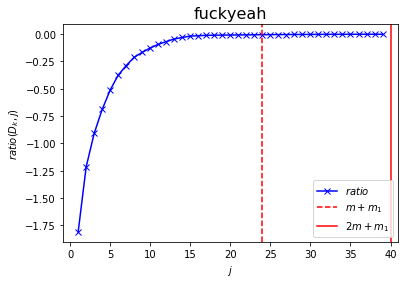

In [4]:
myplots.plot_ratio(D_2, m, m_1)

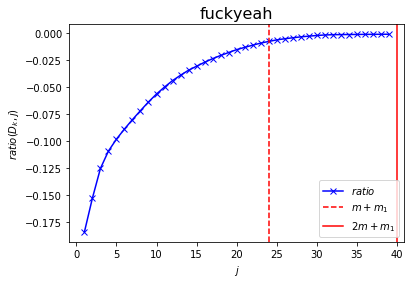

In [5]:
myplots.plot_ratio(D_3, m, m_1)

In [6]:
from tensor_util import vectorize_symm_tensor, tensor2, tensor3
l = A.dot(B[:,0])
l.shape
v = vectorize_symm_tensor(tensor2(l,l))
v = v /np.linalg.norm(v)

In [7]:
U_2, D_2

(array([[-0.00372001, -0.01920534, -0.05309821, ...,  0.03832747,
          0.11514972, -0.34147859],
        [-0.00941033,  0.00494623, -0.04895755, ...,  0.02955535,
         -0.09179362,  0.01829475],
        [-0.00774749, -0.00582374, -0.04016819, ..., -0.03624052,
         -0.0769935 ,  0.19910758],
        ..., 
        [-0.0107445 , -0.00127318,  0.01868749, ..., -0.03083846,
          0.0087874 , -0.01714847],
        [ 0.04851231, -0.06556526, -0.01453154, ..., -0.01208845,
          0.00876109,  0.00222722],
        [ 0.04612495, -0.04850928, -0.0164363 , ..., -0.01159299,
          0.00561975,  0.02323215]]),
 array([  6.26430377e-01,   5.10043759e-01,   4.07009610e-01,
          3.79534729e-01,   3.72700756e-01,   3.35588196e-01,
          2.42009220e-01,   2.27222276e-01,   1.40488016e-01,
          1.33502038e-01,   1.11789739e-01,   9.11625236e-02,
          8.44300550e-02,   5.14519511e-02,   4.70712554e-02,
          1.34743190e-02,   1.31111593e-02,   4.17137581e-03,


In [8]:
D_3

array([  1.76883189e+00,   5.61760723e-02,   5.05651331e-02, ...,
         1.76432855e-16,   1.76432855e-16,   2.92405129e-17])

In [9]:
arr = []
for i in range(m):
    o = np.reshape(tensor2(A[:,i], A[:,i]), d**2)
    o = o / np.linalg.norm(o)
    arr.append(o)
arr = np.array(arr).T
np.max(arr)

0.41030877871859039

In [10]:

for i in range(m):
    print(np.max(U_2.T.dot( np.reshape(tensor2(A[:,i], A[:,i]), d**2))))

0.859161319655
0.735394002762
0.9759424884
0.987899121886
0.982737777679
0.0966743131609
0.0291239560582
0.991383333006
0.978991272137
0.00871649418411
0.896404505099
0.198693537278
0.950982522294
0.0832938614162
0.0694259781329
0.0076003846626


In [11]:
C = A.dot(B)
for i in range(m_1):
    print(np.max(U_2.T.dot(np.reshape(tensor2(C[:,i], C[:,i]), d**2))))

0.532294871679
0.279151773305
0.336479021435
0.316361469199
0.316865374183
0.406531398347
0.44829982574
0.388924648281


In [12]:
C.T.dot(C)

array([[  1.00000000e+00,   1.98162452e-16,  -1.17315950e-16,
         -7.23019677e-16,   3.00361710e-18,  -6.64206355e-17,
         -6.52365268e-17,  -1.10786723e-16],
       [  1.98162452e-16,   1.00000000e+00,   1.30663757e-16,
          3.23185911e-16,  -5.59114792e-18,   3.46901317e-16,
         -1.53412879e-16,  -6.03627933e-17],
       [ -1.17315950e-16,   1.30663757e-16,   1.00000000e+00,
         -2.49433599e-16,   2.58606053e-16,   1.70236529e-16,
         -3.45867230e-16,  -2.51781240e-16],
       [ -7.23019677e-16,   3.23185911e-16,  -2.49433599e-16,
          1.00000000e+00,  -1.71121936e-16,   1.71304053e-16,
          1.17417195e-16,  -1.29172048e-16],
       [  3.00361710e-18,  -5.59114792e-18,   2.58606053e-16,
         -1.71121936e-16,   1.00000000e+00,   2.38666038e-16,
          1.30759253e-17,  -2.58325153e-16],
       [ -6.64206355e-17,   3.46901317e-16,   1.70236529e-16,
          1.71304053e-16,   2.38666038e-16,   1.00000000e+00,
         -4.95987557e-19,  -1.4

In [13]:
A.T.dot(A.dot(B))

array([[ 0.13639118, -0.04082088, -0.40984474, -0.08950462, -0.33777763,
         0.51360985,  0.17211685, -0.0544673 ],
       [ 0.10114954, -0.25410561,  0.15514674,  0.25397567, -0.02663347,
        -0.16190332, -0.10527992, -0.02366198],
       [-0.52674886, -0.27121736,  0.0778385 , -0.19616745,  0.23809801,
         0.03989401, -0.01167948, -0.40493564],
       [ 0.03210784, -0.31830804,  0.11134321, -0.23875955,  0.23096264,
         0.19920976,  0.47622928, -0.07313278],
       [-0.47506088, -0.15457055, -0.1929128 , -0.35192204, -0.23114963,
         0.08012463, -0.09359573,  0.47248149],
       [-0.54019272,  0.02479096, -0.15740478,  0.70800248, -0.03871256,
         0.15113864,  0.06754147,  0.08671379],
       [-0.16769305, -0.07513138,  0.0447836 , -0.31999255,  0.04405367,
        -0.01221963, -0.0330014 ,  0.2708267 ],
       [-0.24963979,  0.13704974,  0.08924114, -0.10036672,  0.08380409,
        -0.2205591 , -0.00076933, -0.38638119],
       [ 0.04358364, -0.25046627

In [14]:
print(U_2[:,:3])

[[-0.00372001 -0.01920534 -0.05309821]
 [-0.00941033  0.00494623 -0.04895755]
 [-0.00774749 -0.00582374 -0.04016819]
 ..., 
 [-0.0107445  -0.00127318  0.01868749]
 [ 0.04851231 -0.06556526 -0.01453154]
 [ 0.04612495 -0.04850928 -0.0164363 ]]


In [15]:
ddf[0]

array([[ -7.57177815e-04,   2.42514109e-04,   1.65094794e-04,
          6.63766041e-05,  -2.38944559e-04,   3.39775623e-04,
          3.43209995e-04,   3.93687419e-05,  -4.20637770e-05,
         -5.32008646e-04,  -2.70611122e-04,  -1.05967003e-03,
         -9.77395542e-05,  -3.12927366e-04,   3.85778815e-04,
          1.56934237e-04,   2.11712114e-03,   4.35175669e-04,
          4.30015385e-04,   4.15359274e-04,  -7.77453667e-04,
         -4.24210216e-05,   1.36209061e-03,   9.09776428e-05,
         -6.02821939e-04],
       [  2.42514109e-04,  -7.18539982e-04,   5.76630973e-04,
         -1.13447179e-04,   1.41199929e-04,  -2.42203363e-04,
         -1.63831436e-04,  -1.46645517e-04,   2.02153885e-05,
         -3.46389777e-05,   1.18771396e-04,  -2.93292840e-04,
          5.30150151e-04,   1.06546593e-04,  -3.58524738e-04,
          4.92693740e-06,  -8.49522248e-05,  -1.34653506e-04,
          3.46783992e-04,   4.02945057e-06,  -4.52782053e-04,
          1.97161122e-04,   4.52585950e-04,

In [16]:
#B.dot(ddg(B.T.dot(np.ones(d))))

In [17]:
lel = U_3[:,0]

In [18]:
lel = np.reshape(lel, (d,d,d))

In [19]:
lel.shape

(25, 25, 25)

In [20]:
np.linalg.norm(lel)

0.99999999999999956

In [32]:
D_2_c = D_2
D_3_c = D_3
D_2_c[m+m_1:] = 0
D_3_c[m+m_1:] = 0

In [33]:
recover = U_2.dot(np.diag(D_2_c)).dot(V_2)

In [34]:
U,D,V = np.linalg.svd(recover, full_matrices=False)

In [35]:
something = np.reshape(U_2.dot(D_2_c), (d,d)) 

In [36]:
U,D,V = np.linalg.svd(something, full_matrices=False)

In [37]:
D

array([ 0.819,  0.488,  0.4  ,  0.301,  0.264,  0.24 ,  0.206,  0.14 ,
        0.136,  0.118,  0.081,  0.061,  0.051,  0.014,  0.013,  0.006,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [38]:
np.set_printoptions(precision=3,suppress=True)
print(U.T.dot(A))

[[ 0.002  0.001 -0.    -0.009  0.001 -0.    -0.003  0.003 -0.005 -0.01
  -0.002  0.003 -0.007 -0.006 -0.009 -1.   ]
 [-0.     0.001  0.001  0.002  0.002  0.014  0.001 -0.002  0.001  1.    -0.001
  -0.002  0.005  0.     0.021 -0.01 ]
 [ 0.005  0.     0.009  0.003 -0.011 -0.007 -0.015  0.009 -0.003  0.022
   0.004  0.006  0.001 -0.012 -0.999  0.009]
 [ 0.017  0.003 -0.911  0.016 -0.385 -0.07  -0.013 -0.124 -0.024  0.002
   0.001  0.018  0.004  0.019 -0.004 -0.001]
 [-0.009 -0.006 -0.295 -0.007  0.415  0.034  0.003  0.86  -0.025  0.001
   0.002 -0.01  -0.008 -0.007  0.001  0.003]
 [-0.013  0.006 -0.277  0.03   0.819  0.014 -0.016 -0.493 -0.089 -0.003
   0.008 -0.003  0.013 -0.001 -0.016 -0.   ]
 [ 0.002  0.006 -0.054 -0.019  0.076 -0.013 -0.004 -0.025  0.994 -0.001
  -0.036  0.007  0.007  0.019 -0.005 -0.004]
 [-0.011  0.03   0.02   0.997 -0.014  0.011 -0.003  0.022  0.019 -0.002
  -0.063  0.002  0.008  0.012  0.003 -0.009]
 [-0.06  -0.003  0.011 -0.013  0.009  0.01   0.154  0.004 -0.019 

In [28]:
A.T.dot(A.dot(B))

array([[ 0.136, -0.041, -0.41 , -0.09 , -0.338,  0.514,  0.172, -0.054],
       [ 0.101, -0.254,  0.155,  0.254, -0.027, -0.162, -0.105, -0.024],
       [-0.527, -0.271,  0.078, -0.196,  0.238,  0.04 , -0.012, -0.405],
       [ 0.032, -0.318,  0.111, -0.239,  0.231,  0.199,  0.476, -0.073],
       [-0.475, -0.155, -0.193, -0.352, -0.231,  0.08 , -0.094,  0.472],
       [-0.54 ,  0.025, -0.157,  0.708, -0.039,  0.151,  0.068,  0.087],
       [-0.168, -0.075,  0.045, -0.32 ,  0.044, -0.012, -0.033,  0.271],
       [-0.25 ,  0.137,  0.089, -0.1  ,  0.084, -0.221, -0.001, -0.386],
       [ 0.044, -0.25 , -0.304,  0.072, -0.126, -0.612,  0.411,  0.209],
       [ 0.077,  0.165,  0.044,  0.143,  0.111,  0.296,  0.087,  0.115],
       [-0.024,  0.327, -0.083, -0.084, -0.085, -0.223,  0.446, -0.065],
       [ 0.15 , -0.086,  0.113, -0.085, -0.216,  0.168,  0.024, -0.105],
       [ 0.135, -0.63 ,  0.071,  0.229,  0.109,  0.131,  0.179, -0.007],
       [ 0.182, -0.119, -0.531, -0.037,  0.552, -0.

In [29]:
D

array([ 0.819,  0.488,  0.4  ,  0.3  ,  0.264,  0.24 ,  0.206,  0.14 ,
        0.137,  0.118,  0.081,  0.061,  0.051,  0.014,  0.013,  0.006,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [30]:
A

array([[ 0.212, -0.033,  0.286, -0.122, -0.641, -0.248, -0.218, -0.231,
        -0.073,  0.052,  0.123, -0.199, -0.15 ,  0.064, -0.165, -0.039],
       [ 0.199,  0.356, -0.212,  0.164, -0.202,  0.098,  0.064,  0.242,
        -0.186,  0.333, -0.017, -0.199,  0.063,  0.063, -0.231, -0.001],
       [-0.214, -0.012, -0.077, -0.348, -0.118, -0.061,  0.181, -0.118,
        -0.391, -0.202, -0.331,  0.287, -0.204, -0.075, -0.215, -0.209],
       [ 0.068,  0.01 , -0.001, -0.447, -0.036,  0.031,  0.148,  0.014,
         0.149,  0.111,  0.071,  0.236,  0.1  , -0.013, -0.342,  0.222],
       [ 0.01 , -0.174,  0.062, -0.25 , -0.068,  0.113, -0.155,  0.341,
        -0.285, -0.062,  0.203, -0.175,  0.102,  0.235,  0.339, -0.21 ],
       [ 0.199, -0.148, -0.318,  0.199, -0.003,  0.242, -0.327,  0.024,
        -0.111, -0.089, -0.146,  0.212,  0.298, -0.356, -0.222,  0.082],
       [ 0.078, -0.356, -0.03 ,  0.01 , -0.164,  0.011,  0.021, -0.007,
         0.173,  0.178,  0.056,  0.102,  0.103, -0.138,  0

In [31]:
np.linalg.norm(A[:,0] + U[:,0])

1.4156035735264354